In [1]:
#import libraries

#plot making
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#stats packages
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#important base packages
import numpy as np
import pandas as pd

#sklearn packages
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
#Upload dataframes
customer = pd.read_csv('Data/update_customer.csv') #our updated customers df
check_trans = pd.read_csv('Data/twm_checking_tran.csv', sep=';') #checking transactions
credit_trans = pd.read_csv('Data/twm_credit_tran.csv', sep=';') #credit transactions
savings_trans = pd.read_csv('Data/twm_savings_tran.csv', sep=';') #savings transactions

## Prep the transaction sub plots

In [3]:
check_trans.head()

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0  1363481       26     -0.15          -0.15           0.0        58.99   
1  1362784       90   -200.00        -200.00           0.0      1380.69   
2  1363088       46      0.00           0.00           0.0       128.35   
3  1363306       32    -40.32         -40.32           0.0       433.06   
4  1363251       11    -87.88         -87.88           0.0      1919.55   

   tran_date     tran_time channel tran_code  
0  29.1.1995                            FK    
1   2.7.1995         53313      A       WD    
2  26.3.1995           834      A       IQ    
3  29.1.1995                    P       WD    
4   8.2.1995                    P       WD

In [4]:
#add column Type and assign checking to all
check_trans = check_trans.assign(Type='Chequing')

#see new dataframe
check_trans.head()

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0  1363481       26     -0.15          -0.15           0.0        58.99   
1  1362784       90   -200.00        -200.00           0.0      1380.69   
2  1363088       46      0.00           0.00           0.0       128.35   
3  1363306       32    -40.32         -40.32           0.0       433.06   
4  1363251       11    -87.88         -87.88           0.0      1919.55   

   tran_date     tran_time channel tran_code      Type  
0  29.1.1995                            FK    Chequing  
1   2.7.1995         53313      A       WD    Chequing  
2  26.3.1995           834      A       IQ    Chequing  
3  29.1.1995                    P       WD    Chequing  
4   8.2.1995                    P       WD    Chequing

In [5]:
credit_trans.head()

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0  1363088       46   -121.49        -121.49           0.0      -141.00   
1  1363306       32   -220.64        -220.64           0.0      -520.13   
2  1362959       10      0.00           0.00           0.0     -3900.00   
3  1363429       13   -195.27        -195.27           0.0     -1739.74   
4  1363393       14    -37.32         -37.32           0.0      -198.98   

    tran_date tran_time channel tran_code  
0  20.10.1995    101144      E       CG    
1  13.10.1995     83115      E       CG    
2   26.2.1995     84129      K       IQ    
3    3.1.1995    191815      E       CG    
4    4.7.1995    100811      E       CG

In [6]:
#add column Type and assign checking to all
credit_trans = credit_trans.assign(Type='Credit')

#see new table
credit_trans.head()

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0  1363088       46   -121.49        -121.49           0.0      -141.00   
1  1363306       32   -220.64        -220.64           0.0      -520.13   
2  1362959       10      0.00           0.00           0.0     -3900.00   
3  1363429       13   -195.27        -195.27           0.0     -1739.74   
4  1363393       14    -37.32         -37.32           0.0      -198.98   

    tran_date tran_time channel tran_code    Type  
0  20.10.1995    101144      E       CG    Credit  
1  13.10.1995     83115      E       CG    Credit  
2   26.2.1995     84129      K       IQ    Credit  
3    3.1.1995    191815      E       CG    Credit  
4    4.7.1995    100811      E       CG    Credit

In [7]:
savings_trans.head()

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0  1363481       26    136.03         136.03          0.00      1521.57   
1  1362746        1      2.83           0.00          2.83      2265.90   
2  1363251       11     13.56           0.00         13.56      5438.90   
3  1362542        4      0.76           0.00          0.76       610.92   
4  1363387       11    148.69         148.69          0.00       470.05   

    tran_date tran_time channel tran_code  
0  26.10.1995     84111      A       DP    
1   31.1.1995    235959              IN    
2   30.4.1995    235959              IN    
3   30.4.1995    235959              IN    
4   21.5.1995    144736      E       DP

In [8]:
#add column Type and assign checking to all
savings_trans = savings_trans.assign(Type='Savings')

#see new table
savings_trans.head()

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0  1363481       26    136.03         136.03          0.00      1521.57   
1  1362746        1      2.83           0.00          2.83      2265.90   
2  1363251       11     13.56           0.00         13.56      5438.90   
3  1362542        4      0.76           0.00          0.76       610.92   
4  1363387       11    148.69         148.69          0.00       470.05   

    tran_date tran_time channel tran_code     Type  
0  26.10.1995     84111      A       DP    Savings  
1   31.1.1995    235959              IN    Savings  
2   30.4.1995    235959              IN    Savings  
3   30.4.1995    235959              IN    Savings  
4   21.5.1995    144736      E       DP    Savings

## Join subplots & merge customers

In [9]:
new_trans = pd.concat([savings_trans, credit_trans, check_trans])
new_trans

cust_id  tran_id  tran_amt  principal_amt  interest_amt  new_balance  \
0      1363481       26    136.03         136.03          0.00      1521.57   
1      1362746        1      2.83           0.00          2.83      2265.90   
2      1363251       11     13.56           0.00         13.56      5438.90   
3      1362542        4      0.76           0.00          0.76       610.92   
4      1363387       11    148.69         148.69          0.00       470.05   
...        ...      ...       ...            ...           ...          ...   
46199  1363272       50     -0.15          -0.15          0.00       319.71   
46200  1363393       61   -102.52        -102.52          0.00        57.47   
46201  1363365       25   -275.89        -275.89          0.00      2632.93   
46202  1363031       73     -0.15          -0.15          0.00      1103.47   
46203  1363011        6   1261.26        1261.26          0.00     13654.61   

        tran_date     tran_time channel tran_code      Type  
0      26.10.1995         84111      A       DP     Savings  
1       31.1.1995        235959              IN     Savings  
2       30.4.1995        235959              IN     Savings  
3       30.4.1995        235959              IN     Savings  
4       21.5.1995        144736      E       DP     Savings  
...           ...           ...     ...       ...       ...  
46199   3.10.1995                            FK    Chequing  
46200   22.1.1995                    P       WD    Chequing  
46201    8.1.1995                    P       WD    Chequing  
46202   23.1.1995                            FK    Chequing  
46203    7.1.1995         94214      B       DP    Chequing  

[77560 rows x 11 columns]

In [10]:
#Drop columns that aren't needed. ie. Noise
new_trans.drop('channel', axis=1, inplace=True)
new_trans.drop('tran_code', axis=1, inplace=True)
new_trans.drop('tran_time', axis=1, inplace=True)

In [11]:
customer.head()

Unnamed: 0  cust_id  income  Tier_income  age Age_Group  years_with_bank  \
0           0  1362691   26150   Low Middle   46     40-49                5   
1           1  1362487    6605       Lowest   71     70-79                1   
2           2  1363160   18548   Low Middle   38     30-39                8   
3           3  1362752   47668  High Middle   54     50-59                3   
4           4  1362548   44554  High Middle   59     50-59                9   

   nbr_children gender  marital_status  \
0             1     M                2   
1             0     M                2   
2             0     F                1   
3             0     F                1   
4             2     F                4   

                                          first_name  \
0  Donald                                        ...   
1  ChingDyi                                      ...   
2  Rosa                                          ...   
3  Lisa                                          ...   
4  Barbara                                       ...   

                                           last_name state_code     Region  
0  Marek                                         ...       NV         West  
1  Moussavi                                      ...       CA         West  
2  Johnston                                      ...       CA         West  
3  Martin                                        ...       CA         West  
4  O'Malley                                      ...       NY    Northeast

In [12]:
#Drop columns that aren't needed. ie. Noise
customer.drop('Unnamed: 0', axis=1, inplace=True)
customer.drop('first_name', axis=1, inplace=True)
customer.drop('last_name', axis=1, inplace=True)
customer.drop('state_code', axis=1, inplace=True)

customer

cust_id  income  Tier_income  age Age_Group  years_with_bank  \
0    1362691   26150   Low Middle   46     40-49                5   
1    1362487    6605       Lowest   71     70-79                1   
2    1363160   18548   Low Middle   38     30-39                8   
3    1362752   47668  High Middle   54     50-59                3   
4    1362548   44554  High Middle   59     50-59                9   
..       ...     ...          ...  ...       ...              ...   
742  1363324   14795       Lowest   36     30-39                6   
743  1362895   26387   Low Middle   56     50-59                6   
744  1362569   61300  High Middle   50     50-59                0   
745  1363364   15100   Low Middle   37     30-39                7   
746  1363303   17875   Low Middle   18     10-19                3   

     nbr_children gender  marital_status     Region  
0               1     M                2       West  
1               0     M                2       West  
2               0     F                1       West  
3               0     F                1       West  
4               2     F                4  Northeast  
..            ...    ...             ...        ...  
742             1     F                4       West  
743             1     M                2  Northeast  
744             2     M                2       West  
745             0     F                2      South  
746             0     F                1       West  

[747 rows x 10 columns]

In [13]:
merged_df = pd.merge(customer, new_trans, on = 'cust_id')
merged_df

cust_id  income Tier_income  age Age_Group  years_with_bank  \
0      1362487    6605      Lowest   71     70-79                1   
1      1362487    6605      Lowest   71     70-79                1   
2      1362487    6605      Lowest   71     70-79                1   
3      1362487    6605      Lowest   71     70-79                1   
4      1362487    6605      Lowest   71     70-79                1   
...        ...     ...         ...  ...       ...              ...   
77555  1363303   17875  Low Middle   18     10-19                3   
77556  1363303   17875  Low Middle   18     10-19                3   
77557  1363303   17875  Low Middle   18     10-19                3   
77558  1363303   17875  Low Middle   18     10-19                3   
77559  1363303   17875  Low Middle   18     10-19                3   

       nbr_children gender  marital_status Region  tran_id  tran_amt  \
0                 0     M                2   West        5   -200.00   
1                 0     M                2   West       10   -204.66   
2                 0     M                2   West       15    -40.00   
3                 0     M                2   West        2      1.92   
4                 0     M                2   West        7      1.28   
...             ...    ...             ...    ...      ...       ...   
77555             0     F                1   West       53   -194.41   
77556             0     F                1   West       13    -52.43   
77557             0     F                1   West       33      0.00   
77558             0     F                1   West       93     17.40   
77559             0     F                1   West       73     -6.56   

       principal_amt  interest_amt  new_balance  tran_date      Type  
0            -200.00          0.00       511.36  27.2.1995   Savings  
1            -204.66          0.00       310.54  13.5.1995   Savings  
2             -40.00          0.00        25.66  27.6.1995   Savings  
3               0.00          1.92       771.36  31.1.1995   Savings  
4               0.00          1.28       513.92  31.3.1995   Savings  
...              ...           ...          ...        ...       ...  
77555        -194.41          0.00      1302.57  29.3.1995  Chequing  
77556         -52.43          0.00      3136.40  21.2.1995  Chequing  
77557           0.00          0.00      2136.38   5.3.1995  Chequing  
77558          17.40          0.00        18.10   2.5.1995  Chequing  
77559          -6.56          0.00       602.04  12.4.1995  Chequing  

[77560 rows x 17 columns]

In [14]:
#take month, day and year out of tran_time into new cols
merged_df['tran_date']= pd.to_datetime(merged_df['tran_date']).dt.date
merged_df['day']= pd.to_datetime(merged_df['tran_date']).dt.dayofweek #monday is 0
merged_df['month']= pd.to_datetime(merged_df['tran_date']).dt.month
merged_df['year']= pd.to_datetime(merged_df['tran_date']).dt.year

In [15]:
merged_df.head()

cust_id  income Tier_income  age Age_Group  years_with_bank  nbr_children  \
0  1362487    6605      Lowest   71     70-79                1             0   
1  1362487    6605      Lowest   71     70-79                1             0   
2  1362487    6605      Lowest   71     70-79                1             0   
3  1362487    6605      Lowest   71     70-79                1             0   
4  1362487    6605      Lowest   71     70-79                1             0   

  gender  marital_status Region  tran_id  tran_amt  principal_amt  \
0     M                2   West        5   -200.00        -200.00   
1     M                2   West       10   -204.66        -204.66   
2     M                2   West       15    -40.00         -40.00   
3     M                2   West        2      1.92           0.00   
4     M                2   West        7      1.28           0.00   

   interest_amt  new_balance   tran_date     Type  day  month  year  
0          0.00       511.36  1995-02-27  Savings    0      2  1995  
1          0.00       310.54  1995-05-13  Savings    5      5  1995  
2          0.00        25.66  1995-06-27  Savings    1      6  1995  
3          1.92       771.36  1995-01-31  Savings    1      1  1995  
4          1.28       513.92  1995-03-31  Savings    4      3  1995

## Data Cleaning and EDA

In [16]:
#checking number of M vs F, just in case
customer.gender.value_counts()

#decided not to focus on gender in the end

F     418
M     329
Name: gender, dtype: int64

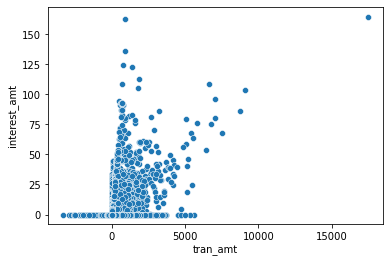

In [17]:
#Quick check on transfer amount vs interest rate -huge outlier
sns.scatterplot(data=merged_df, x="tran_amt", y="interest_amt")

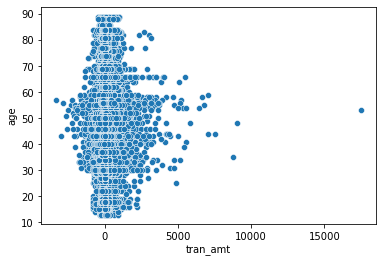

In [18]:
#Quick check on transfer amount vs age -same outlier
sns.scatterplot(data=merged_df, x="tran_amt", y="age")

In [19]:
#drop outlier
merged_df = merged_df.drop(merged_df[(merged_df['tran_amt']>15000) & (merged_df['age']>40)].index)

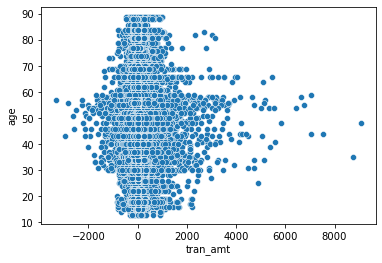

In [20]:
#Check to make sure outlier is gone
sns.scatterplot(data=merged_df, x="tran_amt", y="age")

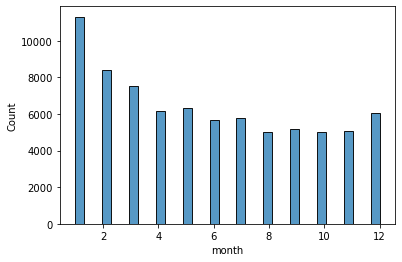

In [21]:
#looking at months as bins, can see lots of tansfers in earlier months
sns.histplot(data=merged_df, x='month')

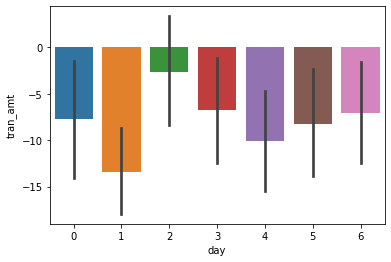

In [22]:
#barplot to compare average trans amounts vs days
sns.barplot(x="day", y = "tran_amt", data = merged_df)
#dirty data but already seeing trend in least and most transfers based on day of week (0 = Monday)

In [23]:
#TTest to check significance between day and transfer amount
stats.ttest_rel(merged_df['day'], merged_df['tran_amt'])

Ttest_relResult(statistic=10.101603121766068, pvalue=5.623658296863346e-24)

In [24]:
#Two way anova checking trans amt vs day and type
model = ols('tran_amt ~ C(day) + C(Type) + C(day):C(Type)', data=merged_df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df          F        PR(>F)
C(day)          8.361538e+05      6.0   1.492490  1.761444e-01
C(Type)         1.079100e+07      2.0  57.784077  8.382575e-26
C(day):C(Type)  2.337781e+06     12.0   2.086407  1.466041e-02
Residual        7.239991e+09  77538.0        NaN           NaN

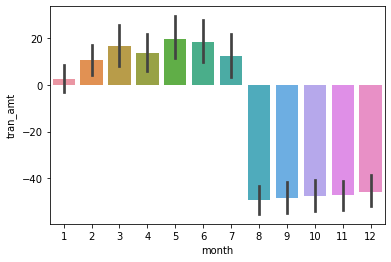

In [25]:
#barplot to compare average trans amounts vs days
sns.barplot(x="month", y = "tran_amt", data = merged_df)
#Can see on average transfer amount were more positive in the first half of the year compared to second

In [26]:
#t.test to compare month and transfer amount
stats.ttest_rel(merged_df['month'], merged_df['tran_amt'])

Ttest_relResult(statistic=12.600908934800886, pvalue=2.266020888422149e-36)

In [27]:
#Two way anova checking trans amt vs month and type
model = ols('tran_amt ~ C(month) + C(Type) + C(month):C(Type)', data=merged_df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df          F         PR(>F)
C(month)          6.943171e+07     11.0  69.606376  2.775169e-156
C(Type)           1.643439e+07      2.0  90.616532   4.916658e-40
C(month):C(Type)  1.438728e+08     22.0  72.117344  2.037033e-319
Residual          7.029861e+09  77523.0        NaN            NaN

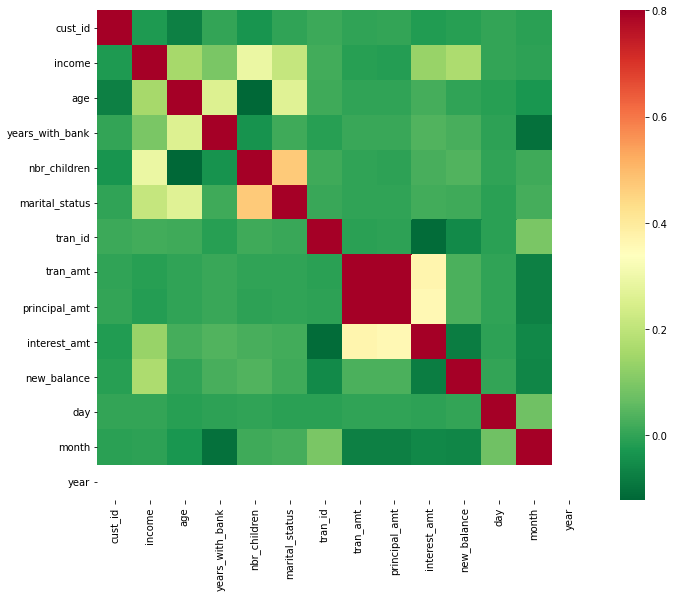

In [28]:
#checking correlations
corrmat = merged_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

# Let's make a radar plot!

Plot will have labels based on age groups, categories are the Types of Transactions.

Need to find proportion of transactions per age group

In [29]:
#Create new variable using group by and get value counts for each type
types_per_group = merged_df.groupby('Type')['Age_Group'].value_counts()
#create other varian;e calculting the grouped proportions
pro_age_type = types_per_group.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
pro_age_type

Type      Age_Group
Chequing  50-59        19.868410
          30-39        19.115228
          40-49        17.602372
          10-19        13.109255
          60-69        11.814994
          20-29         9.813003
          70-79         4.800450
          80-89         3.876288
Credit    40-49        20.470098
          30-39        17.941089
          50-59        17.593970
          60-69        13.101260
          10-19        12.456610
          20-29         9.446593
          70-79         5.370425
          80-89         3.619954
Savings   10-19        22.459558
          50-59        18.393065
          40-49        15.774421
          30-39        13.843954
          60-69        10.224327
          20-29         9.017785
          70-79         6.479578
          80-89         3.807311
Name: Age_Group, dtype: float64

In [30]:
#Create labels
type_trans = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89']

#Copied and pasted values from above for each category
Chequing = [10.282660, 12.639598, 19.115228, 17.602372, 
            19.868410, 11.814994, 4.800450, 3.876288]
Savings = [19.948163, 11.529180, 13.843954, 15.774421,
          18.393065, 10.224327, 6.479578, 6.479578]
Credit = [9.535852, 12.367351, 17.941089, 20.470098, 
          17.593970, 13.101260, 5.370425, 3.619954]

In [31]:
#created plotly figure
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=Chequing, theta=type_trans, fill='toself', name = 'Chequing'))

fig.add_trace(go.Scatterpolar(r=Savings, theta=type_trans, fill='toself', name = 'Savings'))

fig.add_trace(go.Scatterpolar(r=Credit, theta=type_trans, fill='toself', name = 'Credit'))


fig.show()

In [32]:
#perform two-way ANOVA checking age group and type against income
model = ols('income ~ C(Age_Group) + C(Type) + C(Age_Group):C(Type)', data=merged_df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df            F        PR(>F)
C(Age_Group)          1.391455e+13      7.0  6374.949774  0.000000e+00
C(Type)               8.661079e+09      2.0    13.888252  9.321564e-07
C(Age_Group):C(Type)  2.938993e+10     14.0     6.732495  6.057516e-14
Residual              2.417643e+13  77535.0          NaN           NaN

In [33]:
#perform two-way ANOVA checking age group and type against income
model = ols('tran_amt ~ C(Age_Group) + C(Type) + C(Age_Group):C(Type)', data=merged_df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq       df          F        PR(>F)
C(Age_Group)          7.833497e+05      7.0   1.198260  2.996560e-01
C(Type)               1.037519e+07      2.0  55.546855  7.826604e-25
C(Age_Group):C(Type)  1.284303e+06     14.0   0.982274  4.683700e-01
Residual              7.241098e+09  77535.0        NaN           NaN

Haha apparently this isn't what we were suppose to do for the radar plot. But They liked our approach!

# Actual Radar plots with clustering

In [34]:
merged_df.head()

cust_id  income Tier_income  age Age_Group  years_with_bank  nbr_children  \
0  1362487    6605      Lowest   71     70-79                1             0   
1  1362487    6605      Lowest   71     70-79                1             0   
2  1362487    6605      Lowest   71     70-79                1             0   
3  1362487    6605      Lowest   71     70-79                1             0   
4  1362487    6605      Lowest   71     70-79                1             0   

  gender  marital_status Region  tran_id  tran_amt  principal_amt  \
0     M                2   West        5   -200.00        -200.00   
1     M                2   West       10   -204.66        -204.66   
2     M                2   West       15    -40.00         -40.00   
3     M                2   West        2      1.92           0.00   
4     M                2   West        7      1.28           0.00   

   interest_amt  new_balance   tran_date     Type  day  month  year  
0          0.00       511.36  1995-02-27  Savings    0      2  1995  
1          0.00       310.54  1995-05-13  Savings    5      5  1995  
2          0.00        25.66  1995-06-27  Savings    1      6  1995  
3          1.92       771.36  1995-01-31  Savings    1      1  1995  
4          1.28       513.92  1995-03-31  Savings    4      3  1995

### Step one clean up dataframe

In [35]:
#create deep copy
import copy

data_radar = copy.deepcopy(merged_df)

In [36]:
#edit table (ordinals) and drop noise

#Do not need first, last names, unnamed, cust_id, state_code and acct_active
data_radar.drop('cust_id', axis=1, inplace=True)
data_radar.drop('tran_id', axis=1, inplace=True)
data_radar.drop('principal_amt', axis=1, inplace=True) # same as trans amt
data_radar.drop('interest_amt', axis=1, inplace=True)
data_radar.drop('tran_date', axis=1, inplace=True)
data_radar.drop('year', axis=1, inplace=True)

#change to ordinal features
data_radar = data_radar.replace({"Tier_income" : {"Lowest" : 0, "Low Middle" : 1, "High Middle": 2, "Highest": 3},
                             "Age_Group" : {'10-19':0,'20-29':1,'30-39':2,'40-49':3,'50-59':4,
                                            '60-69':5,'70-79':6,'80-89':7},
                             "gender" : {"M " : 0, "F " : 1},
                             "Region" : {"West": 0, "Midwest": 1, "Northeast" : 2, "South": 3},
                        "Type" : {"Chequing": 0, "Savings": 1, "Credit" : 2}
                        })

In [37]:
data_radar.head()

income  Tier_income  age  Age_Group  years_with_bank  nbr_children  gender  \
0    6605          0.0   71          6                1             0       0   
1    6605          0.0   71          6                1             0       0   
2    6605          0.0   71          6                1             0       0   
3    6605          0.0   71          6                1             0       0   
4    6605          0.0   71          6                1             0       0   

   marital_status  Region  tran_amt  new_balance  Type  day  month  
0               2       0   -200.00       511.36     1    0      2  
1               2       0   -204.66       310.54     1    5      5  
2               2       0    -40.00        25.66     1    1      6  
3               2       0      1.92       771.36     1    1      1  
4               2       0      1.28       513.92     1    4      3

In [38]:
#created other deep copy, focus on age and income
df_trans=copy.deepcopy(data_radar)
df_trans.drop('Tier_income', axis=1, inplace=True)
df_trans.drop('Age_Group', axis=1, inplace=True)
df_trans

income  age  years_with_bank  nbr_children  gender  marital_status  \
0        6605   71                1             0       0               2   
1        6605   71                1             0       0               2   
2        6605   71                1             0       0               2   
3        6605   71                1             0       0               2   
4        6605   71                1             0       0               2   
...       ...  ...              ...           ...     ...             ...   
77555   17875   18                3             0       1               1   
77556   17875   18                3             0       1               1   
77557   17875   18                3             0       1               1   
77558   17875   18                3             0       1               1   
77559   17875   18                3             0       1               1   

       Region  tran_amt  new_balance  Type  day  month  
0           0   -200.00       511.36     1    0      2  
1           0   -204.66       310.54     1    5      5  
2           0    -40.00        25.66     1    1      6  
3           0      1.92       771.36     1    1      1  
4           0      1.28       513.92     1    4      3  
...       ...       ...          ...   ...  ...    ...  
77555       0   -194.41      1302.57     0    2      3  
77556       0    -52.43      3136.40     0    1      2  
77557       0      0.00      2136.38     0    2      5  
77558       0     17.40        18.10     0    6      2  
77559       0     -6.56       602.04     0    0     12  

[77559 rows x 12 columns]

# Let's Start Clustering

In [39]:
col = df_trans.columns #extract columns into variable
x = df_trans.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler() #using MinMax scaler to scale data
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=col)
df_scaled

income       age  years_with_bank  nbr_children  gender  \
0      0.045818  0.763158         0.111111           0.0     0.0   
1      0.045818  0.763158         0.111111           0.0     0.0   
2      0.045818  0.763158         0.111111           0.0     0.0   
3      0.045818  0.763158         0.111111           0.0     0.0   
4      0.045818  0.763158         0.111111           0.0     0.0   
...         ...       ...              ...           ...     ...   
77554  0.123997  0.065789         0.333333           0.0     1.0   
77555  0.123997  0.065789         0.333333           0.0     1.0   
77556  0.123997  0.065789         0.333333           0.0     1.0   
77557  0.123997  0.065789         0.333333           0.0     1.0   
77558  0.123997  0.065789         0.333333           0.0     1.0   

       marital_status  Region  tran_amt  new_balance  Type       day     month  
0            0.333333     0.0  0.251650     0.377612   0.5  0.000000  0.090909  
1            0.333333     0.0  0.251273     0.373355   0.5  0.833333  0.363636  
2            0.333333     0.0  0.264587     0.367315   0.5  0.166667  0.454545  
3            0.333333     0.0  0.267976     0.383124   0.5  0.166667  0.000000  
4            0.333333     0.0  0.267924     0.377666   0.5  0.666667  0.181818  
...               ...     ...       ...          ...   ...       ...       ...  
77554        0.000000     0.0  0.252102     0.394386   0.0  0.333333  0.181818  
77555        0.000000     0.0  0.263582     0.433265   0.0  0.166667  0.090909  
77556        0.000000     0.0  0.267821     0.412064   0.0  0.333333  0.363636  
77557        0.000000     0.0  0.269228     0.367155   0.0  1.000000  0.090909  
77558        0.000000     0.0  0.267291     0.379535   0.0  0.000000  1.000000  

[77559 rows x 12 columns]

In [40]:
# rename columns, just so it is cleaner to look at 
df_scaled.rename(columns = {'income':'Income', 'age':'Age', 
                            'years_with_bank': 'Years w/ Bank',
                     'nbr_children':'No. Children', 'gender':'Gender',
                    'marital_status': 'Martial Status', 'Region': 'Region', 
                     'tran_amt': 'Transfer Amount', 'new_balance':'New Balance',
                    'day': 'Day', 'month': 'Month'}, inplace = True)
df_scaled.head()

Income       Age  Years w/ Bank  No. Children  Gender  Martial Status  \
0  0.045818  0.763158       0.111111           0.0     0.0        0.333333   
1  0.045818  0.763158       0.111111           0.0     0.0        0.333333   
2  0.045818  0.763158       0.111111           0.0     0.0        0.333333   
3  0.045818  0.763158       0.111111           0.0     0.0        0.333333   
4  0.045818  0.763158       0.111111           0.0     0.0        0.333333   

   Region  Transfer Amount  New Balance  Type       Day     Month  
0     0.0         0.251650     0.377612   0.5  0.000000  0.090909  
1     0.0         0.251273     0.373355   0.5  0.833333  0.363636  
2     0.0         0.264587     0.367315   0.5  0.166667  0.454545  
3     0.0         0.267976     0.383124   0.5  0.166667  0.000000  
4     0.0         0.267924     0.377666   0.5  0.666667  0.181818

In [41]:
#define function to make distortion plot - pulled from Walkthrough
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

In [42]:
#define function to make cluster plots - pulled from walkthrough
def plot_clusters(X, y_res, plt_clusters_centers= False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x, y, s = 50, marker = 's',
                    label = f"cluster {cluster}")
        
    if plt_clusters_centers:
        plt.scatter(X_centroids, Y_centroids, marker='*',
                    c='red', s=250, label='centroids')
    
    plt.legend()
    plt.grid()
    plt.show()

In [43]:
#function that plots radar chart
def plot_radar(df):
    #create list
    data = []
    # go through each value
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r=df.iloc[i].values, theta=df.iloc[i].index, 
                                    fill='toself', name = f'cluster_{df.index[i]}'))
        
        #mean line
        #data.append(go.Scatterpolar(r=[100]*df.shape[1], theta=df.columns, fill='toself', name = 'Mean'))
        
        #create plot layout
        layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                          showlegend = True)
        fig = go.Figure(data = data, layout = layout)
        fig.show()

## Cluster 1 - income x age

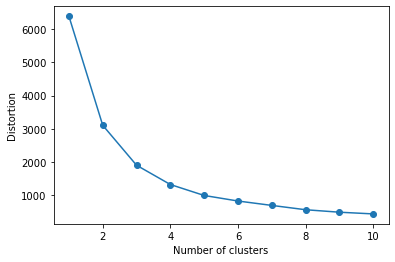

In [44]:
mat = df_scaled[['Income','Age']].values #create array

#check elbow
plot_distortion(mat, max_clusters=10)

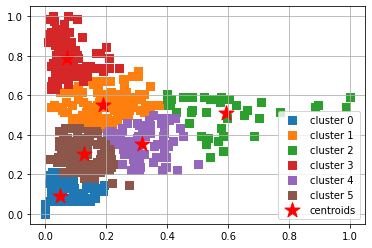

In [45]:
#first check kmeans
km = KMeans(n_clusters=6, 
             n_init = 10,
             random_state=0)

#fit and predict
y_km = km.fit_predict(mat)
plot_clusters(mat, y_km, plt_clusters_centers= True)

In [46]:
#Will take 6 clusters and assign to our DF
df_scaled['AgexIncome'] = KMeans(n_clusters=6, n_init = 10, random_state=0).fit_predict(df_scaled[['Income','Age']].values)
#cluster sizes
df_scaled['AgexIncome'].value_counts()

1    17987
0    16709
5    16005
3    12423
4     9909
2     4526
Name: AgexIncome, dtype: int64

In [47]:
#create other dataframe with index as AgexIncome
radar_df = df_scaled.groupby('AgexIncome').mean().divide(df_scaled.drop('AgexIncome', axis=1).mean())*100
radar_df.head()

Income         Age  Years w/ Bank  No. Children      Gender  \
AgexIncome                                                                    
0            28.044219   21.633599      77.028220     31.883881   97.859595   
1           113.387465  134.191716     109.491797     91.931915  112.529988   
2           355.661130  124.166694     120.379014    136.567304   58.493751   
3            43.383016  192.181079     123.710268      0.000000  103.650536   
4           190.917068   86.555404      86.168558    228.975292   81.903883   

            Martial Status      Region  Transfer Amount  New Balance  \
AgexIncome                                                             
0                34.883844  102.962422       100.104130    99.406012   
1               106.603315   92.836031        99.955380    99.839462   
2               141.715351  122.075850       100.024421   105.870222   
3               130.325715  105.828714       100.083682    98.822731   
4               113.810294  107.481389        99.730051   101.093596   

                  Type         Day       Month  
AgexIncome                                      
0           101.590366  100.200788  100.730651  
1            99.000460   99.986384  100.821155  
2           107.299508  100.542747   95.726418  
3           102.237326   98.408385   95.601922  
4           101.346564  100.605165  105.545940

In [48]:
plot_radar(radar_df)

All other clusters followed same format as above

## Cluster 2 - Type x income

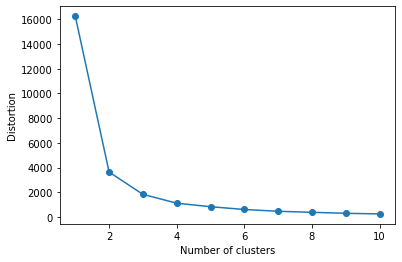

In [49]:
mat = df_scaled[['Income','Type']].values

#check elbow
plot_distortion(mat, max_clusters=10)

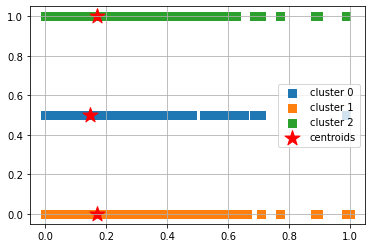

In [50]:
#first check kmeans
km = KMeans(n_clusters=3, 
             n_init = 10,
             random_state=0)

#fit and predict
y_km = km.fit_predict(mat)
plot_clusters(mat, y_km, plt_clusters_centers= True)

In [51]:
#Will take 3 clusters and assign to our DF
df_scaled['TypexIncome'] = KMeans(n_clusters=3, n_init = 10, random_state=0).fit_predict(df_scaled[['Income','Type']].values)
#cluster sizes
df_scaled['TypexIncome'].value_counts()

1    46204
2    20166
0    11189
Name: TypexIncome, dtype: int64

In [52]:
radar_df2 = df_scaled.groupby('TypexIncome').mean().divide(df_scaled.drop('TypexIncome', axis=1).mean())*100
radar_df2.head()

Income         Age  Years w/ Bank  No. Children      Gender  \
TypexIncome                                                                    
0             88.404415   93.581777     101.543160     84.816620   99.915308   
1            101.797032  100.489608      98.091034    102.033467   99.059933   
2            102.316421  102.439335     103.517577    103.765374  102.200856   

             Martial Status      Region  Transfer Amount  New Balance  \
TypexIncome                                                             
0                 93.386320   97.752023       100.682360   103.691362   
1                100.785149   99.985894        99.729133   103.258760   
2                101.870646  101.279597       100.242003    90.485451   

                   Type         Day       Month  AgexIncome  
TypexIncome                                                  
0            150.538615  100.639621  121.208924   88.424448  
1              0.000000   99.666517   89.444143  102.095597  
2            301.077231  100.409179  112.417741  101.621237

In [53]:
radar_df2.drop('AgexIncome', axis=1, inplace=True) #don't need this cluster in radar
plot_radar(radar_df2)

## Cluster 3 - Type x age

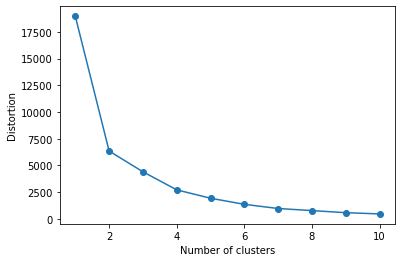

In [54]:
mat = df_scaled[['Age','Type']].values

#check elbow
plot_distortion(mat, max_clusters=10)

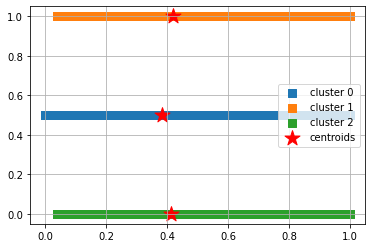

In [55]:
#first check dbscan
db = DBSCAN(eps = 0.2, min_samples=10)

#fit and predict
y_db = db.fit_predict(mat)
plot_clusters(mat, y_db, plt_clusters_centers= True)

In [56]:
#Will take 3 clusters and assign to our DF
df_scaled['TypexAge'] = DBSCAN(eps = 0.2, min_samples=10).fit_predict(df_scaled[['Age','Type']].values)
#cluster sizes
df_scaled['TypexAge'].value_counts()

2    46204
1    20166
0    11189
Name: TypexAge, dtype: int64

In [57]:
radar_df3 = df_scaled.groupby('TypexAge').mean().divide(df_scaled.drop('TypexAge', axis=1).mean())*100
radar_df3.head()

Income         Age  Years w/ Bank  No. Children      Gender  \
TypexAge                                                                    
0          88.404415   93.581777     101.543160     84.816620   99.915308   
1         102.316421  102.439335     103.517577    103.765374  102.200856   
2         101.797032  100.489608      98.091034    102.033467   99.059933   

          Martial Status      Region  Transfer Amount  New Balance  \
TypexAge                                                             
0              93.386320   97.752023       100.682360   103.691362   
1             101.870646  101.279597       100.242003    90.485451   
2             100.785149   99.985894        99.729133   103.258760   

                Type         Day       Month  AgexIncome  TypexIncome  
TypexAge                                                               
0         150.538615  100.639621  121.208924   88.424448     0.000000  
1         301.077231  100.409179  112.417741  101.621237   179.252565  
2           0.000000   99.666517   89.444143  102.095597    89.626283

In [58]:
radar_df3.drop('AgexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df3.drop('TypexIncome', axis=1, inplace=True) #don't need this cluster in radar
plot_radar(radar_df3)

## Cluster 4 - Day x Transfer Amount

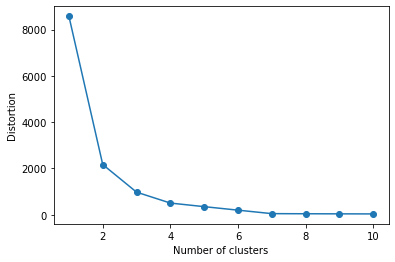

In [59]:
mat = df_scaled[['Day','Transfer Amount']].values

#check elbow
plot_distortion(mat, max_clusters=10)

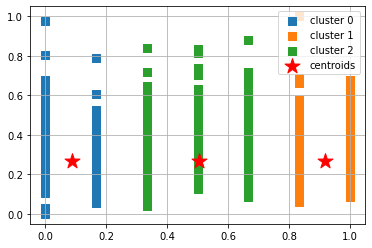

In [60]:
#first check kmeans
km = KMeans(n_clusters=3, 
             n_init = 10,
             random_state=0)

#fit and predict
y_km = km.fit_predict(mat)
plot_clusters(mat, y_km, plt_clusters_centers= True)

In [61]:
#Will take 7 clusters and assign to our DF
df_scaled['DayxTrans'] = KMeans(n_clusters=3, n_init = 10, random_state=0).fit_predict(df_scaled[['Day','Transfer Amount']].values)
#cluster sizes
df_scaled['DayxTrans'].value_counts()

2    33377
0    22404
1    21778
Name: DayxTrans, dtype: int64

In [62]:
radar_df4 = df_scaled.groupby('DayxTrans').mean().divide(df_scaled.drop('DayxTrans', axis=1).mean())*100
radar_df4.head()

Income         Age  Years w/ Bank  No. Children      Gender  \
DayxTrans                                                                    
0           99.392997  100.490135     100.128384    100.945552   99.694051   
1          100.789827   99.564536      99.922939    100.372491   99.913314   
2           99.892095   99.955135      99.964105     99.122263  100.261927   

           Martial Status      Region  Transfer Amount  New Balance  \
DayxTrans                                                             
0              101.256282  100.479540        99.919654   100.044344   
1               99.980845   99.930384       100.012963   100.000112   
2               99.169231   99.723537       100.045473    99.970161   

                 Type         Day       Month  AgexIncome  TypexIncome  \
DayxTrans                                                                
0           97.308526   17.727523   89.196301  100.013146    98.719326   
1           99.925899  183.405766  105.632884  100.723714   100.828539   
2          101.854976  100.803601  103.576509   99.518963   100.319031   

             TypexAge  
DayxTrans              
0          100.247331  
1          100.670814  
2           99.396285

In [63]:
radar_df4.drop('AgexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df4.drop('TypexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df4.drop('TypexAge', axis=1, inplace=True) #don't need this cluster in radar
plot_radar(radar_df4)

## Cluster 5 - Month x Transfer Amount

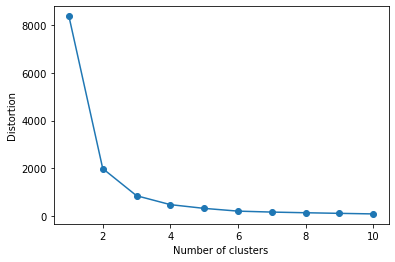

In [64]:
mat = df_scaled[['Month','Transfer Amount']].values

#check elbow
plot_distortion(mat, max_clusters=10)

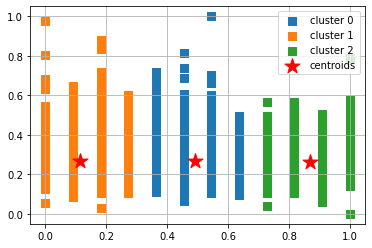

In [65]:
#first check kmeans
km = KMeans(n_clusters=3, 
             n_init = 10,
             random_state=0)

#fit and predict
y_km = km.fit_predict(mat)
plot_clusters(mat, y_km, plt_clusters_centers= True)

In [66]:
#Will take 3 clusters and assign to our DF
df_scaled['MonthxTrans'] = KMeans(n_clusters=3, n_init = 10, random_state=0).fit_predict(df_scaled[['Month','Transfer Amount']].values)
#cluster sizes
df_scaled['MonthxTrans'].value_counts()

1    33405
0    22889
2    21265
Name: MonthxTrans, dtype: int64

In [67]:
radar_df5 = df_scaled.groupby('MonthxTrans').mean().divide(df_scaled.drop('MonthxTrans', axis=1).mean())*100
radar_df5.head()

Income         Age  Years w/ Bank  No. Children      Gender  \
MonthxTrans                                                                    
0            100.182033   99.744843      97.731018    100.124177  101.807645   
1            100.031054  101.434560     107.259179     97.424072   98.563580   
2             99.755283   98.021106      91.038883    103.912843  100.310765   

             Martial Status      Region  Transfer Amount  New Balance  \
MonthxTrans                                                             
0                101.299915   99.358483       100.313783    99.607483   
1                 97.403317  100.265689       100.536358   100.733080   
2                102.679917  100.273141        98.819694    99.270904   

                   Type         Day       Month  AgexIncome  TypexIncome  \
MonthxTrans                                                                
0            116.562361   94.386084  113.760893   99.441122   103.245061   
1             78.453128   98.648343   26.384829  100.446448    98.834407   
2            116.020567  108.165955  200.829612   99.900238    98.338134   

               TypexAge   DayxTrans  
MonthxTrans                          
0             94.914502  102.015814  
1            108.965220   95.334207  
2             91.390491  105.159692

In [68]:
radar_df5.drop('AgexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df5.drop('TypexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df5.drop('TypexAge', axis=1, inplace=True) #don't need this cluster in radar
radar_df5.drop('DayxTrans', axis=1, inplace=True) #don't need this cluster in radar
plot_radar(radar_df5)

## Cluster 6 - Transfer Amount x New balance

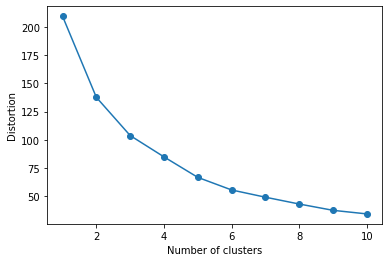

In [69]:
mat = df_scaled[['Transfer Amount','New Balance']].values

#check elbow
plot_distortion(mat, max_clusters=10)

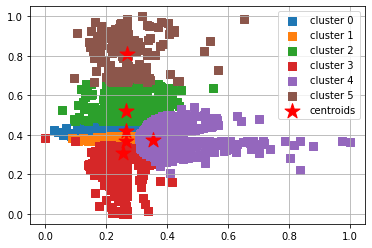

In [70]:
#first check kmeans
km = KMeans(n_clusters=6, 
             n_init = 10,
             random_state=0)

#fit and predict
y_km = km.fit_predict(mat)
plot_clusters(mat, y_km, plt_clusters_centers= True)

In [71]:
#Will take 7 clusters and assign to our DF
df_scaled['TransxBal'] = KMeans(n_clusters=7, n_init = 10, random_state=0).fit_predict(df_scaled[['Transfer Amount','New Balance']].values)
#cluster sizes
df_scaled['TransxBal'].value_counts()

2    53477
0    12974
3     5233
4     3278
5     2139
6      234
1      224
Name: TransxBal, dtype: int64

In [72]:
radar_df6 = df_scaled.groupby('TransxBal').mean().divide(df_scaled.drop('TransxBal', axis=1).mean())*100
radar_df6.head()

Income         Age  Years w/ Bank  No. Children      Gender  \
TransxBal                                                                    
0          100.146066   96.785594      97.622946     98.503619  104.781836   
1          429.797674  127.346379     132.706507    222.332322   54.919008   
2           83.711092   98.779923      98.756029     91.041074  101.403594   
3          173.692231  112.528222     105.990774    145.715783   94.934613   
4          132.985060  103.468566     104.341756    117.871852   95.672091   

           Martial Status      Region  Transfer Amount  New Balance  \
TransxBal                                                             
0               95.694614   98.987199        98.551389   110.309529   
1              169.652182   90.733173       100.122614   212.868305   
2               97.282780   99.713863        99.069264    97.420033   
3              122.488554  104.173097        95.381621    81.563186   
4              105.718537  104.608940       122.788016    98.856213   

                 Type         Day       Month  AgexIncome  TypexIncome  \
TransxBal                                                                
0           24.157654  100.638394   94.076799   99.356053    75.243523   
1           45.699223   98.825816   76.039809   94.480733    62.418304   
2           97.374221   99.923979  101.385685   98.478645    97.784944   
3          301.077231   99.331739  117.140455  110.492457   179.252565   
4          160.274487  100.424623   77.736938  105.396833   127.002466   

             TypexAge   DayxTrans  MonthxTrans  
TransxBal                                       
0          115.679882   99.125203   100.642884  
1           95.962307  105.596050    93.475123  
2           99.499002  100.000175   100.864731  
3           68.896015  101.668045   105.066399  
4           93.171457  101.315703    77.616666

In [73]:
radar_df6.drop('AgexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df6.drop('TypexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df6.drop('TypexAge', axis=1, inplace=True) #don't need this cluster in radar
radar_df6.drop('DayxTrans', axis=1, inplace=True) #don't need this cluster in radar
radar_df6.drop('MonthxTrans', axis=1, inplace=True) #don't need this cluster in radar
plot_radar(radar_df6)

## Cluster 7 - Transfer Amount  x Income

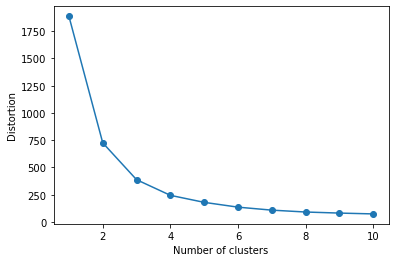

In [74]:
mat = df_scaled[['Transfer Amount','Income']].values

#check elbow
plot_distortion(mat, max_clusters=10)

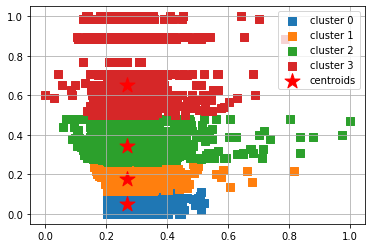

In [75]:
#first check kmeans
km = KMeans(n_clusters=4, 
             n_init = 10,
             random_state=0)

#fit and predict
y_km = km.fit_predict(mat)
plot_clusters(mat, y_km, plt_clusters_centers= True)

In [76]:
#Will take 3 clusters and assign to our DF
df_scaled['TransxIncome'] = KMeans(n_clusters=4, n_init = 10, random_state=0).fit_predict(df_scaled[['Transfer Amount','Income']].values)
#cluster sizes
df_scaled['TransxIncome'].value_counts()

0    35273
1    26332
2    12660
3     3294
Name: TransxIncome, dtype: int64

In [77]:
radar_df7 = df_scaled.groupby('TransxIncome').mean().divide(df_scaled.drop('TransxIncome', axis=1).mean())*100
radar_df7.head()

Income         Age  Years w/ Bank  No. Children      Gender  \
TransxIncome                                                                    
0              30.390404   93.558862      95.075727     51.578000  108.913858   
1             106.203434  103.378237     100.446877    107.768901   99.657133   
2             205.822907  105.892839     109.635825    215.345069   87.480587   
3             389.093037  119.319722     112.124213    113.099551   55.405477   

              Martial Status      Region  Transfer Amount  New Balance  \
TransxIncome                                                             
0                  83.533517   97.002209       100.072704    99.065936   
1                 103.405989   99.290620        99.989977    99.613727   
2                 125.765622  101.825112        99.866496   101.161437   
3                 150.073759  130.757306        99.814694   108.626228   

                    Type         Day       Month  AgexIncome  TypexIncome  \
TransxIncome                                                                
0              98.151194  100.274729   99.537499   83.548945    97.500630   
1             103.436699   99.366732  101.551838  112.537497   101.767288   
2             100.810931   99.834535   97.808640  123.179427   103.856048   
3              89.208068  102.756363  100.969471   86.851598    97.816177   

                TypexAge   DayxTrans  MonthxTrans   TransxBal  
TransxIncome                                                   
0              98.924857   99.989066   100.010360   92.292618  
1              99.785668   99.659201   100.292324   96.757480  
2             102.593023  100.954049    99.427882  121.208039  
3             103.260360   99.174659    99.751095  126.943149

In [78]:
radar_df7.drop('AgexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df7.drop('TypexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df7.drop('TypexAge', axis=1, inplace=True) #don't need this cluster in radar
radar_df7.drop('DayxTrans', axis=1, inplace=True) #don't need this cluster in radar
radar_df7.drop('MonthxTrans', axis=1, inplace=True) #don't need this cluster in radar
radar_df7.drop('TransxBal', axis=1, inplace=True) #don't need this cluster in radar
plot_radar(radar_df7)

## Cluster 8 - Transfer Amount x Nr. Children

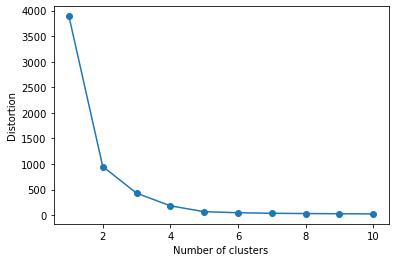

In [79]:
mat = df_scaled[['Transfer Amount','No. Children']].values

#check elbow
plot_distortion(mat, max_clusters=10)

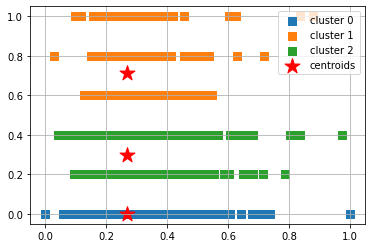

In [80]:
#first check kmeans
km = KMeans(n_clusters=3, 
             n_init = 10,
             random_state=0)

#fit and predict
y_km = km.fit_predict(mat)
plot_clusters(mat, y_km, plt_clusters_centers= True)

In [81]:
#Will take 3 clusters and assign to our DF
df_scaled['TransxChild'] = KMeans(n_clusters=3, n_init = 10, random_state=0).fit_predict(df_scaled[['Transfer Amount','No. Children']].values)
#cluster sizes
df_scaled['TransxChild'].value_counts()

0    48219
2    23448
1     5892
Name: TransxChild, dtype: int64

In [82]:
radar_df8 = df_scaled.groupby('TransxChild').mean().divide(df_scaled.drop('TransxChild', axis=1).mean())*100
radar_df8.head()

Income         Age  Years w/ Bank  No. Children      Gender  \
TransxChild                                                                    
0             77.997675  104.835503     100.680865      0.000000  100.725327   
1            143.267800   80.297143      93.397216    491.375059   99.703978   
2            134.373773   95.007083     100.258999    207.297772   98.582805   

             Martial Status      Region  Transfer Amount  New Balance  \
TransxChild                                                             
0                 58.837871  102.230608       100.002675    99.601614   
1                190.313101   63.416090       100.001986    99.922964   
2                161.952912  104.605710        99.993999   100.838608   

                   Type         Day       Month  AgexIncome  TypexIncome  \
TransxChild                                                                
0            100.830495  100.133950   99.292455   86.741076    98.918093   
1            105.673407  100.967802  104.580509  176.641658   105.157246   
2             96.866540   99.481354  100.304023  108.007481   100.928949   

               TypexAge   DayxTrans  MonthxTrans   TransxBal  TransxIncome  
TransxChild                                                                 
0             98.788247  100.254365    99.783205   97.397127     72.840595  
1            101.367881   99.054410   102.693396  109.831647    163.714079  
2            102.148156   99.714524    99.769026  102.882117    139.841180

In [83]:
radar_df8.drop('AgexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df8.drop('TypexIncome', axis=1, inplace=True) #don't need this cluster in radar
radar_df8.drop('TypexAge', axis=1, inplace=True) #don't need this cluster in radar
radar_df8.drop('DayxTrans', axis=1, inplace=True) #don't need this cluster in radar
radar_df8.drop('MonthxTrans', axis=1, inplace=True) #don't need this cluster in radar
radar_df8.drop('TransxBal', axis=1, inplace=True) #don't need this cluster in radar
radar_df8.drop('TransxIncome', axis=1, inplace=True) #don't need this cluster in radar
plot_radar(radar_df8)

# PCA plot

In [85]:
#using df_scaled
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled)
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 
pca_data.head()

PC1       PC2
0  0.421531 -0.334912
1  0.419062 -0.299861
2  0.420794 -0.308449
3  0.421571 -0.335670
4  0.417939 -0.314950

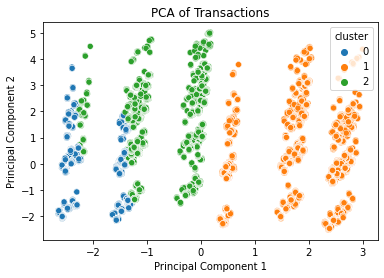

In [86]:
kmeans =KMeans(n_clusters=3).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
ax = sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)
ax.set(xlabel='Principal Component 1', ylabel='Principal Component 2', title='PCA of Transactions')
plt.show()

fig = ax.get_figure()
fig.savefig('Plots/PCA_Transfers.png')

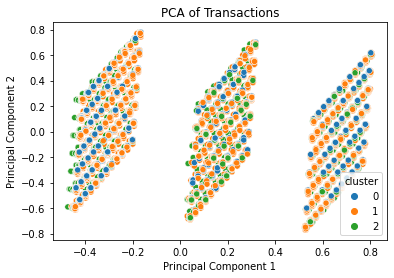

In [87]:
#PCA with only columns that were examined examined in our clusters before - All data is better to include!

pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled[['Income','Age','Type','Transfer Amount','Day',
                                      'Month','New Balance','Income','No. Children']])
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 

kmeans =KMeans(n_clusters=3).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
ax = sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)
ax.set(xlabel='Principal Component 1', ylabel='Principal Component 2', title='PCA of Transactions')
plt.show()

fig = ax.get_figure()
fig.savefig('Plots/PCA_Transfers2.png')

### PCAs based on our clusters and extra

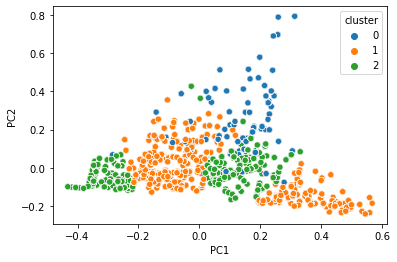

In [88]:
#Cluster 1 Income x Age
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled[['Income','Age']])
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 

kmeans =KMeans(n_clusters=3).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

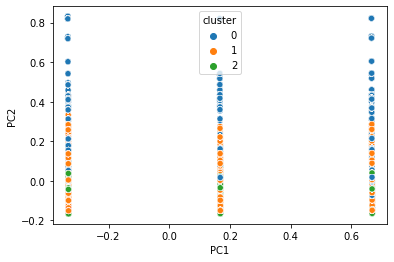

In [89]:
#Cluster 2 Type x Income
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled[['Type','Income']])
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 

kmeans =KMeans(n_clusters=3).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

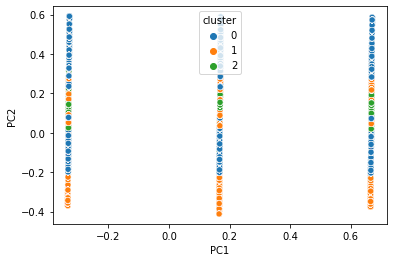

In [90]:
#Cluster 3 Type x Age
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled[['Type','Age']])
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 

kmeans =KMeans(n_clusters=3).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

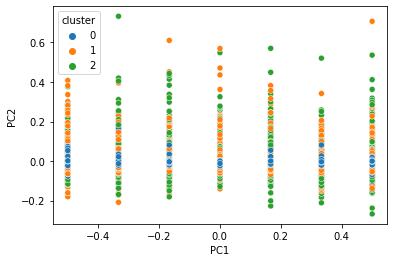

In [91]:
#Cluster 4 Day x Transfer Amount
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled[['Day','Transfer Amount']])
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 

kmeans =KMeans(n_clusters=3).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

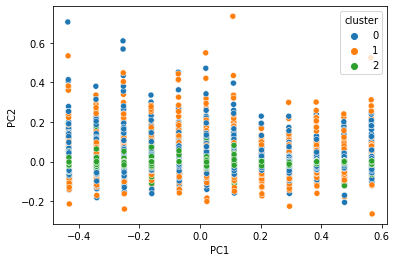

In [92]:
#Cluster 5 Month x Transfer Amount
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled[['Month','Transfer Amount']])
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 

kmeans =KMeans(n_clusters=3).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

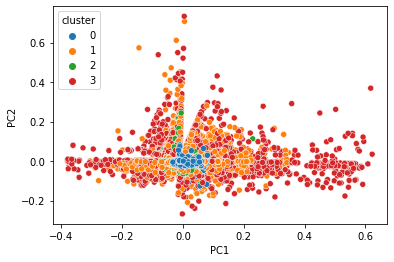

In [93]:
#Cluster 6 New Balnace x Transfer Amount
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled[['New Balance','Transfer Amount']])
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 

kmeans =KMeans(n_clusters=4).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

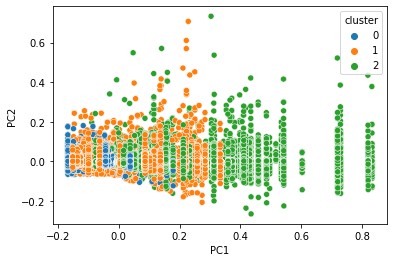

In [94]:
#Cluster 7 Income x Transfer Amount
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled[['Income','Transfer Amount']])
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 

kmeans =KMeans(n_clusters=3).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

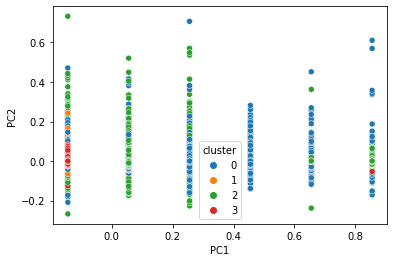

In [95]:
#Cluster 8 No. Children x Transfer Amount
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled[['No. Children','Transfer Amount']])
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 

kmeans =KMeans(n_clusters=4).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

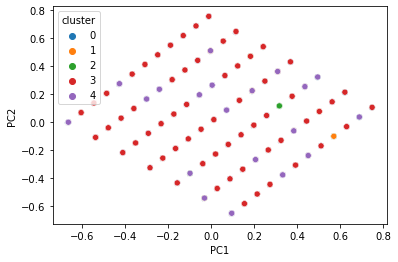

In [96]:
#testing month, day, transfer amount and income

pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df_scaled[['Day','Transfer Amount','Month','Income']])
pca_data = pd.DataFrame(pca_fit,columns=['PC1','PC2']) 

kmeans =KMeans(n_clusters=5).fit(df_scaled)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [ ]:
#retrieved from Fynn

def radar_plot(data, cluster, 
               title = "Clustering", 
               save=False, 
               cluster_map=False):
    """Creates a radar plot from inputed data and clustering model output
    data should be DataFrame and cluster an np.array
    
    title can be specified to set plot title or it will default to 'Clustering'
    
    save can be specified as a string in which case the image is saved to the path
    of that inputted string. If no string is specified the image will not be saved.
    
    cluster_map specifies how many of the identified clusters to draw. 
    Must be integer > 0
    """
    
    #concatinate clustering and data
    data_cluster = pd.concat([data,pd.DataFrame(cluster)], axis=1)
    data_cluster = data_cluster.rename(columns= {0: 'cluster'})
    #group by cluster with median and save to new frame
    clustered = data_cluster.groupby('cluster').median()
    #generate category labels
    categories = [*clustered.columns, clustered.columns[0]]

    #empty object for defining groups
    radar = []
    #define groups, last element must be first element to close radar group
    for i in range(len(clustered)):
        radar.append([*clustered.iloc[i], clustered.iloc[i, 0]])
    
    #label location for radar plot
    label_loc = np.linspace(start=0, stop=2 * np.pi, 
                            num=len(radar[0]))
    #color scheme
    colors = ['royalblue', 'darkorange', 'forestgreen', 'sienna', 'mediumpurple']  
        #initiate plot
    plt.figure(figsize=(8,8))
    plt.subplot(polar = True)
    
    #if cluster map is defined
    if bool(cluster_map):
        cluster_map = cluster_map
    else:
        cluster_map = len(radar)
    
    #loop through every cluster
    for i in range(0,cluster_map):
        #if there are outliers (ex with DBSCAN) id them
        if clustered.index[i] < 0:
            plt.plot(label_loc, radar[i], label=f"Outliers", color='red')
        #else plot as cluster
        else: 
            plt.plot(label_loc, radar[i], label=f"Cluster {i}", color=colors[i])
    
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)

    plt.title(title)
    plt.legend()
    
    #if save path is defined save figure
    if bool(save):
        plt.savefig(save)
    #if not just show
    else:
        plt.show()